<a href="https://colab.research.google.com/github/LBryant01/Homework4/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#London Bryant
#8 September 2024
#CS4410

from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Feature matrix shape: (569, 30)
Target vector shape: (569,)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 398
Testing set size: 171


In [19]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

# Training the Model
nb.fit(X_train, y_train)

# Predicting
y_pred = nb.predict(X_test)

# Estimator Method Score
score = nb.score(X_test, y_test)
print(f"Accuracy of GaussianNB: {score:.4f}")

Accuracy of GaussianNB: 0.9415


In [24]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


[[ 52   9]
 [  1 109]]


In [25]:
# Classification Report
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred, target_names=breast_cancer.target_names)
print(f"Classification Report:\n{class_report}")


Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.85      0.91        61
      benign       0.92      0.99      0.96       110

    accuracy                           0.94       171
   macro avg       0.95      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



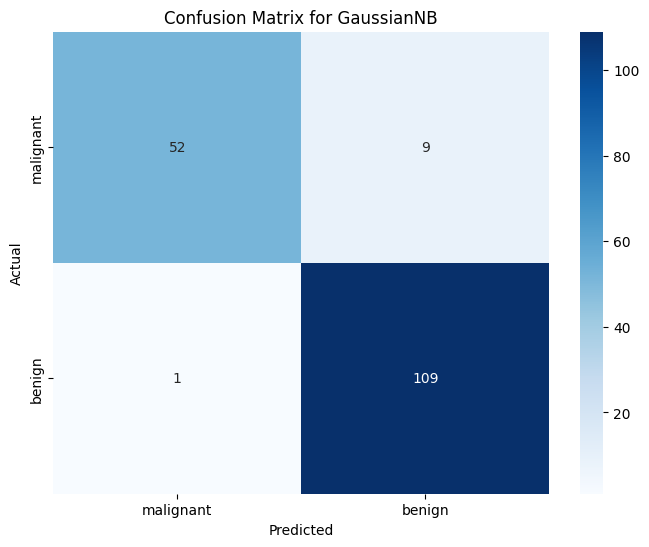

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for GaussianNB')
plt.show()

In [27]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(estimator=nb, X=X, y=y, cv=kfold)
print(f"K-Fold Cross-Validation Scores: {scores}")
print(f"Mean Accuracy from Cross-Validation: {scores.mean():.4f}")

K-Fold Cross-Validation Scores: [0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]
Mean Accuracy from Cross-Validation: 0.9385


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

estimators = {
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')
}

for name, model in estimators.items():
    # Create a pipeline for standard scaling and classification
    pipeline = make_pipeline(StandardScaler(), model)

    # Train the model
    pipeline.fit(X_train, y_train)

    # Evaluate the model
    score = pipeline.score(X_test, y_test)
    print(f"Accuracy of {name}: {score:.4f}")


Accuracy of GaussianNB: 0.9415
Accuracy of KNeighborsClassifier: 0.9649
Accuracy of LogisticRegression: 0.9532
Accuracy of SVC: 0.9649


KNN and SVC have the same level of accuracy.

In [29]:
# Support Vector Classifier
pipeline_svc = make_pipeline(StandardScaler(), SVC(gamma='scale'))
pipeline_svc.fit(X_train, y_train)
y_pred_svc = pipeline_svc.predict(X_test)
print(f"\nSupport Vector Classifier Accuracy: {pipeline_svc.score(X_test, y_test):.4f}")
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print(f"Confusion Matrix for SVC:\n{conf_matrix_svc}")
print(f"Classification Report for SVC:\n{classification_report(y_test, y_pred_svc, target_names=breast_cancer.target_names)}")



Support Vector Classifier Accuracy: 0.9649
Confusion Matrix for SVC:
[[ 57   4]
 [  2 108]]
Classification Report for SVC:
              precision    recall  f1-score   support

   malignant       0.97      0.93      0.95        61
      benign       0.96      0.98      0.97       110

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [30]:
cross_val_scores_svc = cross_val_score(estimator=pipeline_svc, X=X, y=y, cv=kfold)
print(f"K-Fold Cross-Validation Scores for SVC:\n{cross_val_scores_svc}")
print(f"Mean Accuracy from Cross-Validation for SVC: {cross_val_scores_svc.mean():.4f}")

K-Fold Cross-Validation Scores for SVC:
[0.98245614 0.96491228 0.96491228 0.98245614 1.         1.
 0.98245614 0.96491228 0.98245614 0.96428571]
Mean Accuracy from Cross-Validation for SVC: 0.9789
